In [17]:
#importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [18]:
#Test set Image Processing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [19]:
#Loading Model
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

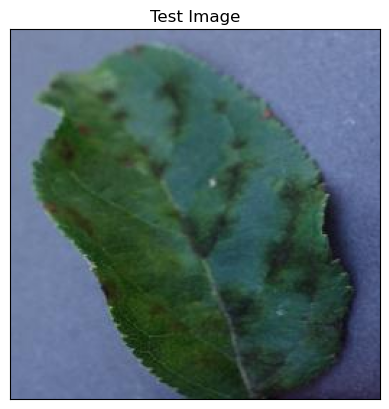

In [20]:
#Visualising and Performing Prediction on Single image
#Test Image Visualization
import cv2
image_path = "C:\\Users\\PRANALI\\Projects\\Final Year\\General CNN\\test\\AppleScab2.JPG" # Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
#Testing Model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


In [22]:
print(predictions)

[[6.0079324e-01 8.1918230e-14 2.5731048e-13 3.9902252e-01 2.4220057e-11
  6.0605222e-11 1.3918332e-15 1.3421812e-08 3.3072971e-14 1.2430618e-10
  3.1893928e-14 1.4115318e-14 3.4141810e-15 1.8706589e-16 4.0595589e-17
  2.1673521e-11 1.6342005e-07 1.3258149e-13 7.4287541e-14 5.6990938e-14
  1.4118128e-09 6.1674761e-08 2.4068534e-12 1.4019342e-14 9.4833841e-13
  3.7114704e-11 4.1992743e-11 2.9846277e-12 5.6676038e-14 5.8351768e-11
  5.9301009e-10 1.8397915e-04 8.4403107e-10 3.3209619e-15 2.0403821e-14
  2.9610125e-15 1.2108287e-15 5.5469507e-13]]


In [23]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


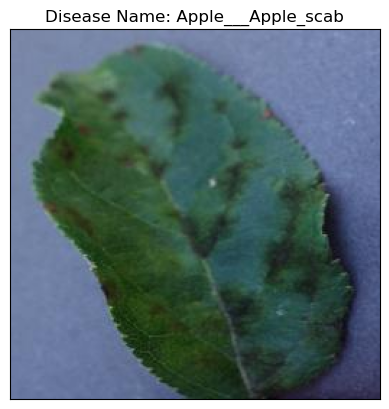

In [24]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()